In [2]:
import sys
sys.path.append("../")

import pandas as pd
import matplotlib.pyplot as plt
import os
from src.preprocessing import DatasetPreprocessor

os.makedirs("../results/plots", exist_ok=True)

In [3]:
preprocessor = DatasetPreprocessor(
    input_dir="../data/raw", 
    output_dir="../data/preprocessed"
)
preprocessor.preprocess_all()

Saved: ../data/preprocessed\masakhane_afrisenti_twi_test_preprocessed.csv
Saved: ../data/preprocessed\masakhane_afrisenti_twi_train_preprocessed.csv
Saved: ../data/preprocessed\masakhane_afrisenti_twi_validation_preprocessed.csv


In [4]:
train = pd.read_csv("../data/preprocessed/masakhane_afrisenti_twi_train_preprocessed.csv")

In [5]:
train["label"].unique()

array(['negative', 'positive'], dtype=object)

In [6]:
class_counts = train["label"].value_counts()
print(class_counts)

label
positive    1644
negative    1315
Name: count, dtype: int64


In [7]:
class_percentage = train["label"].value_counts(normalize=True) * 100
print(f"\nSentiment class distribution: \n{class_percentage.map('{:.2f}%'.format)}")


Sentiment class distribution: 
label
positive    55.56%
negative    44.44%
Name: proportion, dtype: object


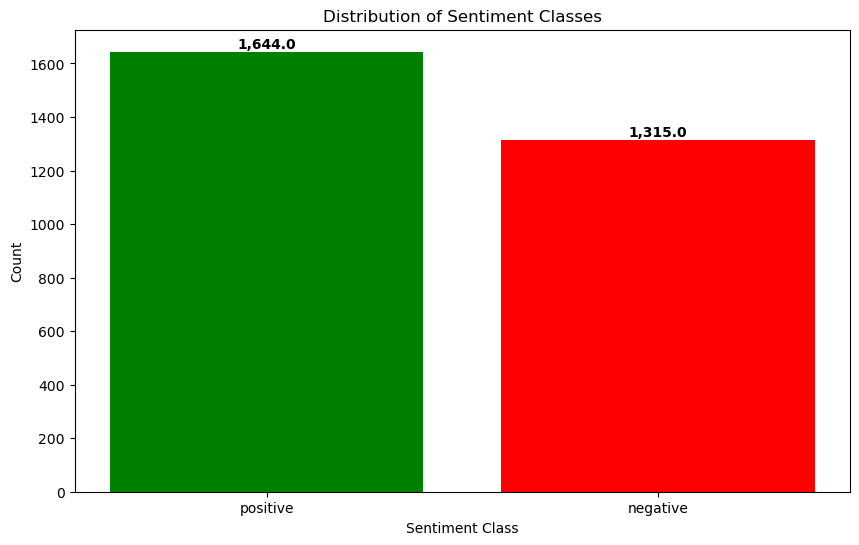

In [13]:
color = {"positive": "green", "negative": "red", "neutral": "skyblue"}
plt.figure(figsize=(10, 6))
bars = plt.bar(
    class_counts.index,
    class_counts.values.astype(float),
    color=[color[label] for label in class_counts.index],
)
plt.title("Distribution of Sentiment Classes")
plt.xlabel("Sentiment Class")
plt.ylabel("Count")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{height:,}",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
    )

plt.savefig("../results/plots/sentiment_class_bar.png")

plt.show()

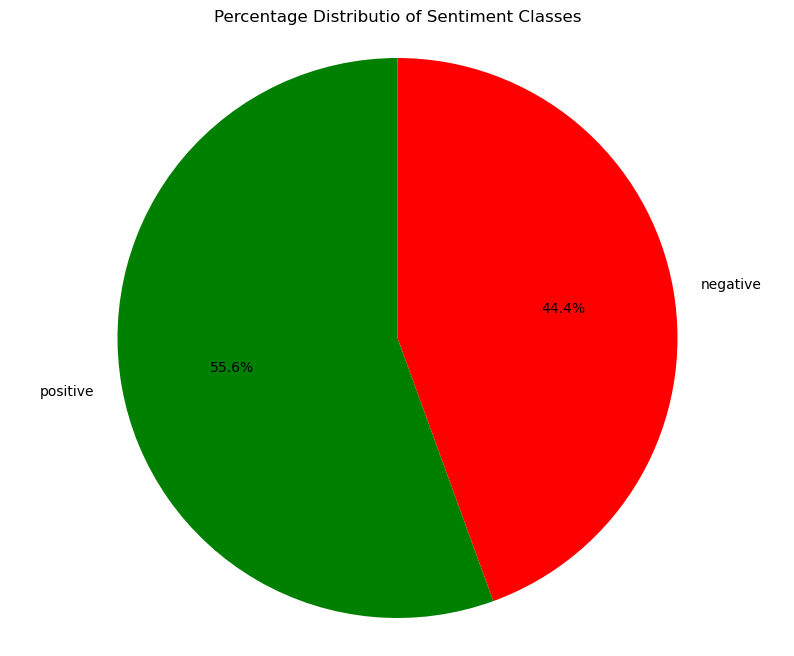

In [14]:
color = {"positive": "green", "negative": "red", "neutral": "skyblue"}

colors = [color[label] for label in class_counts.index]

plt.figure(figsize=(10, 8))
plt.pie(
    class_counts,
    labels=class_counts.index.tolist(),
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
)
plt.title("Percentage Distributio of Sentiment Classes")
plt.axis("equal")
plt.savefig("../results/plots/sentiment_class_pier.png")
plt.show()